In [340]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.cluster
from PIL import Image
import os

In [341]:
clusters = 3

In [342]:
healthy_potato_datapath = 'PlantVillage/Potato___Late_blight/'

files = os.listdir(healthy_potato_datapath)

In [343]:
image = Image.open(healthy_potato_datapath + '/' + files[0])

original_array = np.array(image)

image_array = original_array.reshape(-1, 3)

In [344]:
model = sklearn.cluster.KMeans(n_clusters = clusters, max_iter=600)

model.fit(image_array)

KMeans(max_iter=600, n_clusters=3)

In [345]:
model.cluster_centers_.astype(int)

array([[153, 143, 143],
       [ 58,  68,  41],
       [103, 121,  79]])

In [346]:
predicted = model.predict(image_array)

predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [347]:
predicted_image = model.cluster_centers_[predicted].astype(int)

new_image = predicted_image.reshape(original_array.shape)

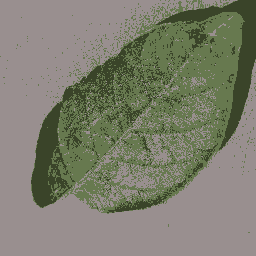

In [348]:
image=Image.fromarray(np.uint8(new_image))

image

In [349]:
def cluster_image(image, clusters):
    original_array = np.array(image)
    image_array = original_array.reshape(-1, 3)

    model = sklearn.cluster.KMeans(n_clusters = clusters)
    model.fit(np.unique(image_array, axis=1))

    predicted = model.predict(image_array)
    new_array = model.cluster_centers_[predicted].astype(int).reshape(original_array.shape)
    return Image.fromarray(np.uint8(new_array))